<a href="https://colab.research.google.com/github/yoouza/bigcontest/blob/master/visualizing/SinHan_card_data_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
path = r'/content/gdrive/My Drive/project/Bigcon/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt'

In [9]:
# 국내 신한카드 지출
data = pd.read_csv(path, sep='\t', parse_dates=['STD_DD'])
data

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,110,517,10,F,25,11,595
1,2019-02-01,110,517,10,F,50,5,243
2,2019-02-01,110,517,10,F,55,5,27
3,2019-02-01,110,517,10,M,20,11,243
4,2019-02-01,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,2020-05-31,350,720,81,M,45,19,127
2537749,2020-05-31,350,720,81,M,50,33,211
2537750,2020-05-31,350,720,81,M,55,9,61
2537751,2020-05-31,350,720,81,M,60,19,194


In [10]:
# 일단위 총 사용량 추이
daily_spend = data.groupby('STD_DD').sum()[['USE_CNT', 'USE_AMT']]
daily_spend

,USE_CNT,USE_AMT
STD_DD,,
2019-02-01,1319053,34605684
2019-02-02,1296035,37994472
2019-02-03,1043187,27437695
2019-02-04,972141,22806220
2019-02-05,656908,11457297
...,...,...
2020-05-27,1298112,32336892
2020-05-28,1259754,31234479
2020-05-29,1363500,33423717


In [11]:
daily_spend['year'] = daily_spend.index.year
daily_spend['month'] = daily_spend.index.month
daily_spend['day'] = daily_spend.index.day
daily_spend.head()

,USE_CNT,USE_AMT,year,month,day
STD_DD,,,,,
2019-02-01,1319053,34605684,2019,2,1
2019-02-02,1296035,37994472,2019,2,2
2019-02-03,1043187,27437695,2019,2,3
2019-02-04,972141,22806220,2019,2,4
2019-02-05,656908,11457297,2019,2,5


[Text(0, 0.5, 'USE_AMT'), Text(0.5, 1.0, 'by Day')]

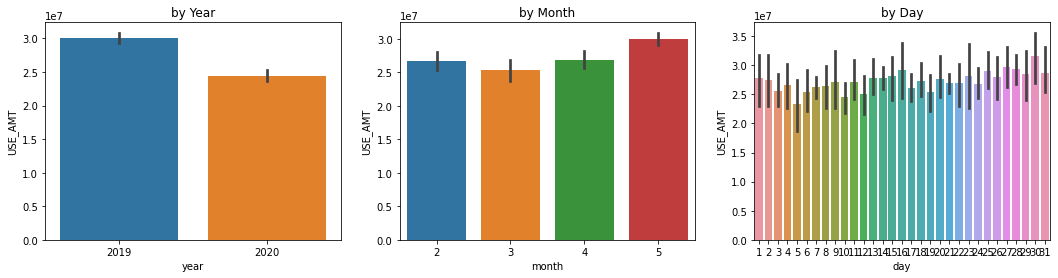

In [12]:
# visualizing
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,4)

sns.barplot(data=daily_spend, x='year', y='USE_AMT', ax=ax1)
sns.barplot(data=daily_spend, x='month', y='USE_AMT', ax=ax2)
sns.barplot(data=daily_spend, x='day', y='USE_AMT', ax=ax3)

ax1.set(ylabel='USE_AMT', title='by Year')
ax2.set(ylabel='USE_AMT', title='by Month')
ax3.set(ylabel='USE_AMT', title='by Day')

In [13]:
# 2019 data 2020 data seperate
data_2019 = daily_spend[daily_spend['year'] == 2019].reset_index(drop=False)
data_2020 = daily_spend[daily_spend['year'] == 2020].reset_index(drop=False)
data_2019.head()

,STD_DD,USE_CNT,USE_AMT,year,month,day
0,2019-02-01,1319053,34605684,2019,2,1
1,2019-02-02,1296035,37994472,2019,2,2
2,2019-02-03,1043187,27437695,2019,2,3
3,2019-02-04,972141,22806220,2019,2,4
4,2019-02-05,656908,11457297,2019,2,5


[Text(0, 0.5, 'USE_AMT'), Text(0.5, 1.0, 'by Day')]

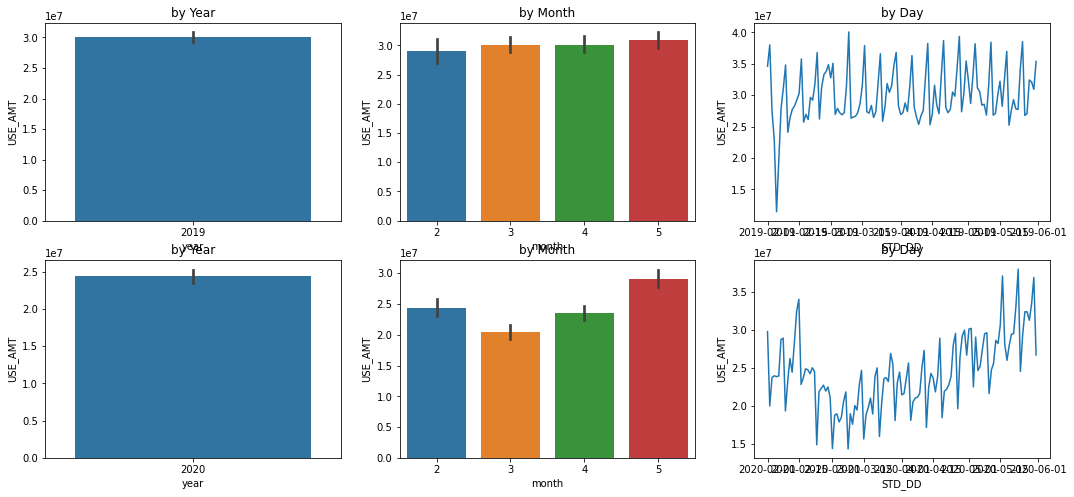

In [14]:
# visualizing2019 2020 비교
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=data_2019, x='year', y='USE_AMT', ax=ax1)
sns.barplot(data=data_2019, x='month', y='USE_AMT', ax=ax2)
sns.lineplot(data=data_2019, x='STD_DD', y='USE_AMT', ax=ax3)
sns.barplot(data=data_2020, x='year', y='USE_AMT', ax=ax4)
sns.barplot(data=data_2020, x='month', y='USE_AMT', ax=ax5)
sns.lineplot(data=data_2020, x='STD_DD', y='USE_AMT', ax=ax6)

ax1.set(ylabel='USE_AMT', title='by Year')
ax2.set(ylabel='USE_AMT', title='by Month')
ax3.set(ylabel='USE_AMT', title='by Day')
ax4.set(ylabel='USE_AMT', title='by Year')
ax5.set(ylabel='USE_AMT', title='by Month')
ax6.set(ylabel='USE_AMT', title='by Day')

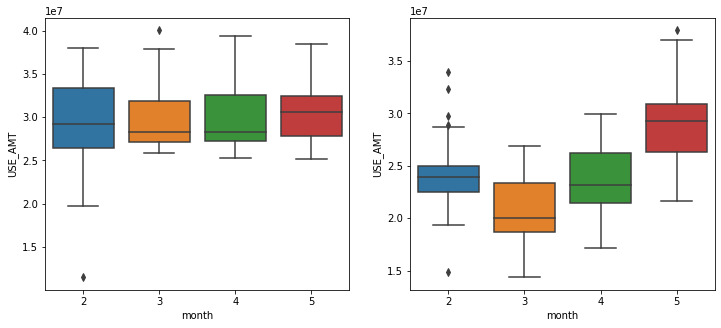

In [15]:
# box plot
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)
sns.boxplot(data=data_2019, y='USE_AMT', x='month', orient='v', ax=axes[0])
sns.boxplot(data=data_2020, y='USE_AMT', x='month', orient='v', ax=axes[1])

# axes[0][0].set(ylabel='USE_AMT', title='monthly Amt')
# axes[0][1].set(ylabel='USE_AMT', title='monthly Amt')

In [16]:
# 요일 컬럼 추가(월요일=0, 일요일=6)
data_2019['dayofweek'] = data_2019['STD_DD'].dt.dayofweek
data_2020['dayofweek'] = data_2019['STD_DD'].dt.dayofweek

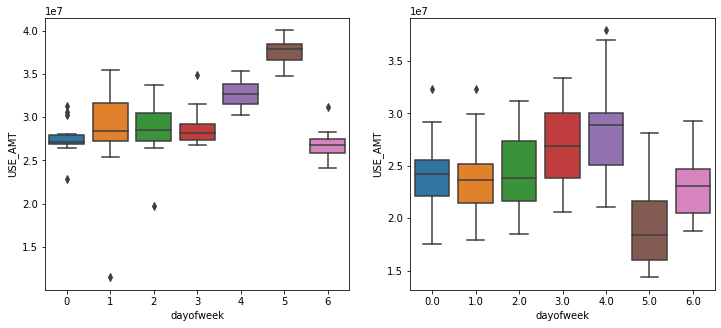

In [17]:
# 요일별 소비분포(주말소비의 급격한 감소)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)
sns.boxplot(data=data_2019, y='USE_AMT', x='dayofweek', orient='v', ax=axes[0])
sns.boxplot(data=data_2020, y='USE_AMT', x='dayofweek', orient='v', ax=axes[1])

In [20]:
data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,110,517,10,F,25,11,595
1,2019-02-01,110,517,10,F,50,5,243
2,2019-02-01,110,517,10,F,55,5,27
3,2019-02-01,110,517,10,M,20,11,243
4,2019-02-01,110,517,10,M,25,11,433
